In [1]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.stats import norm
from math import ceil
import torch
from matplotlib.ticker import FormatStrFormatter
from collections import Counter

### Create theoretical population

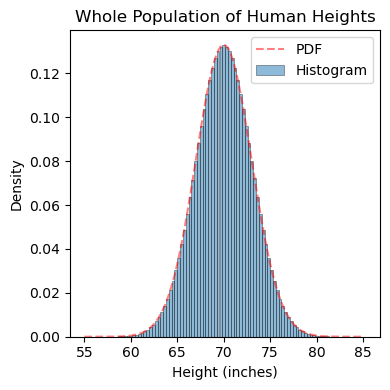

In [2]:
lowest_height_whole_pop= 55
highest_height_whole_pop = 85
mean_height_whole_pop = 70
std_height_whole_pop = 3
num_bars_whole_pop = 100
n_points_x_axis = 1000

def normal_distribution(x, mu, sigma):
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

def create_whole_population(f_normal_distribution, lowest_height, highest_height, mean_height, std_height, n_points):
    x_values = np.linspace(lowest_height, highest_height, n_points)
    pdf_curve = [f_normal_distribution(x, mean_height, std_height) for x in x_values]
    return pd.DataFrame({'Height': x_values, 'Density': pdf_curve})

def plot_whole_population(df, num_bins, lowest_height, highest_height):
    fig, ax = plt.subplots(figsize=(4, 4))
    bin_width = (highest_height - lowest_height) / num_bins
    mid_x_values = np.linspace(lowest_height, highest_height, num_bins) + bin_width / 2
    pdf_values = [df['Density'].iloc[np.argmin(np.abs(df['Height'] - x))] for x in mid_x_values]
    ax.plot(df['Height'], df['Density'], label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    ax.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')
    ax.set_title('Whole Population of Human Heights')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Density')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Create whole population
df_whole_pop = create_whole_population(normal_distribution, lowest_height_whole_pop, highest_height_whole_pop, 
                                       mean_height_whole_pop, std_height_whole_pop, n_points_x_axis)

# Plot whole population with histogram bars
plot_whole_population(df_whole_pop, num_bars_whole_pop, lowest_height_whole_pop, highest_height_whole_pop)

### Create mini roughly-normal population 01

,Height,Count,Probability
0,63.33,1,0.0625
1,66.67,4,0.2500
2,70.00,6,0.3750
3,73.33,4,0.2500
4,76.67,1,0.0625


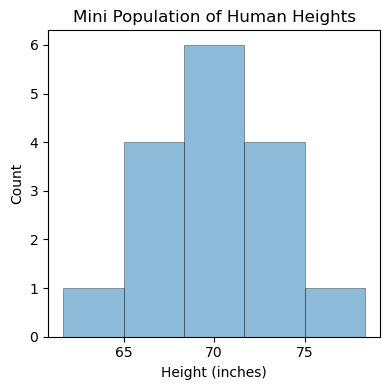

Unique elements: [63.33 66.67 70.   73.33 76.67]
Total count of elements: 16
Mean: 70.0
Std: 3.33


In [3]:
lowest_height_mini_pop_01= 55
mean_height_mini_pop_01 = 70
highest_height_mini_pop_01 = 85
std_height_mini_pop_01 = 3
num_bars_mini_pop_01 = 100
# approx_num_bars_mini_pop_01=9
# approx_total_count_mini_pop_01=30
approx_num_bars_mini_pop_01=9
approx_total_count_mini_pop_01=15

def create_mini_population(f_normal_distribution, start, end, n_bins, total_count, mean_height, std_height):
    bin_edges = np.linspace(start, end, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    bin_centers = np.round(bin_centers, 2)  # Round bin_centers to two decimal places
    bin_width = (end - start) / n_bins
    densities = np.array([np.mean(f_normal_distribution(np.linspace(edge, bin_edges[i+1], 100), mean_height, std_height)) for i, edge in enumerate(bin_edges[:-1])])
    float_counts = densities * total_count / sum(densities)
    int_counts = np.round(float_counts).astype(int)
    non_zero_indices = int_counts != 0
    bin_centers = bin_centers[non_zero_indices]
    int_counts = int_counts[non_zero_indices]
    probabilities = int_counts / sum(int_counts)  # Calculate probabilities
    return pd.DataFrame({'Height': bin_centers, 'Count': int_counts, 'Probability': probabilities})

def plot_mini_population(df, ax, label):
    centers = df['Height']
    counts = df['Count']
    bin_width = centers.iloc[1] - centers.iloc[0]
    ax.bar(centers, counts, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
    
def calculate_weighted_mean(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    return weighted_mean

def calculate_weighted_std(df_col_value, df_col_count):
    weighted_mean = (df_col_value * df_col_count).sum() / df_col_count.sum()
    squared_deviations = ((df_col_value - weighted_mean) ** 2) * df_col_count
    weighted_variance = squared_deviations.sum() / df_col_count.sum()
    weighted_std = np.sqrt(weighted_variance)
    return weighted_std


# Create mini (discretized) population
df_mini_pop_01 = create_mini_population(normal_distribution, lowest_height_mini_pop_01, highest_height_mini_pop_01, 
                                        approx_num_bars_mini_pop_01, approx_total_count_mini_pop_01, mean_height_mini_pop_01, std_height_mini_pop_01)

# Display mini population
display(df_mini_pop_01)

# Plot mini population
fig, ax = plt.subplots(figsize=(4, 4))
plot_mini_population(df_mini_pop_01, ax, "Population 1")
ax.set_title('Mini Population of Human Heights')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Summary
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

### Create mini roughly-normal population 02

Mini pop 01


,Height,Count,Probability
0,63.33,1,0.0625
1,66.67,4,0.2500
2,70.00,6,0.3750
3,73.33,4,0.2500
4,76.67,1,0.0625


Total count of elements: 16
Mean: 70.0
Std: 3.33

Mini pop 02


,Height,Count,Probability
0,83.33,1,0.0625
1,86.67,4,0.2500
2,90.00,6,0.3750
3,93.33,4,0.2500
4,96.67,1,0.0625


Total count of elements: 16
Mean: 90.0
Std: 3.33


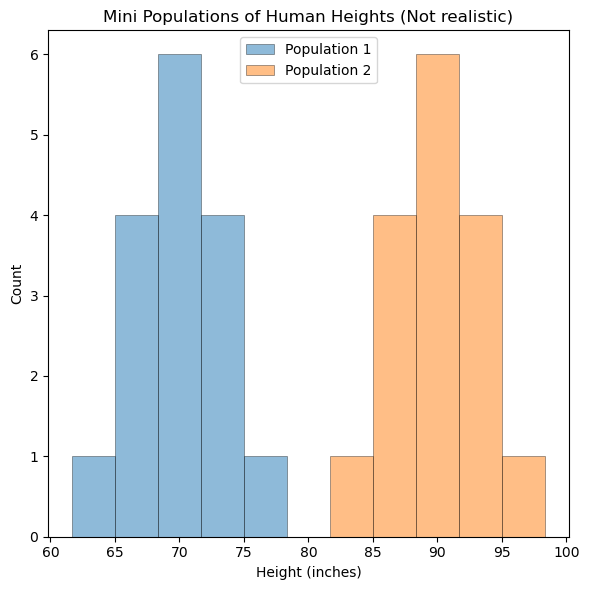

In [4]:
lowest_height_mini_pop_02= 75
mean_height_mini_pop_02 = 90
highest_height_mini_pop_02 = 105
std_height_mini_pop_02 = 3
num_bars_mini_pop_02 = 100
approx_num_bars_mini_pop_02=9
approx_total_count_mini_pop_02=15

def plot_two_mini_pops(df1, df2):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot the first mini population
    plot_mini_population(df1, ax, "Population 1")
    
    # Plot the second mini population
    plot_mini_population(df2, ax, "Population 2")
    
    ax.set_title('Mini Populations of Human Heights (Not realistic)')
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Count')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
# Create mini (discretized) population
df_mini_pop_02 = create_mini_population(normal_distribution, lowest_height_mini_pop_02, highest_height_mini_pop_02, 
                                        approx_num_bars_mini_pop_02, approx_total_count_mini_pop_02, mean_height_mini_pop_02, std_height_mini_pop_02)

# Summary
# Mini pop 01
mean_mini_pop_01 = calculate_weighted_mean(df_mini_pop_01['Height'], df_mini_pop_01['Count'])
std_mini_pop_01 = calculate_weighted_std(df_mini_pop_01['Height'], df_mini_pop_01['Count'])

print('Mini pop 01')
display(df_mini_pop_01)
#print(f"Unique elements: {df_mini_pop_01['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")

print('')

# Mini pop 02
mean_mini_pop_02 = calculate_weighted_mean(df_mini_pop_02['Height'], df_mini_pop_02['Count'])
std_mini_pop_02 = calculate_weighted_std(df_mini_pop_02['Height'], df_mini_pop_02['Count'])

print('Mini pop 02')
display(df_mini_pop_02)
#print(f"Unique elements: {df_mini_pop_02['Height'].unique()}")
print(f"Total count of elements: {df_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_mini_pop_02}")
print(f"Std: {std_mini_pop_02:.2f}")

# Plot mini population
plot_two_mini_pops(df_mini_pop_01, df_mini_pop_02)

### SDSM of the mini population 02

SDSM mini pop 01 estimated by the exhaustive method:


,Mean_rectified,Count,Probability
0,63.3,1,9.536743e-07
1,64.0,5,1.907349e-05
2,64.7,15,1.811981e-04
3,65.3,35,1.087189e-03
4,66.0,70,4.620552e-03
5,66.7,121,1.478577e-02
6,67.3,185,3.696442e-02
7,68.0,255,7.392883e-02
8,68.7,320,1.201344e-01
9,69.3,365,1.601791e-01


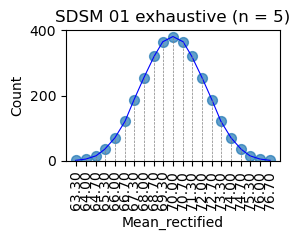

Mini pop mean: 70.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49
SDSM empirical SE/theoretical SE: 100.04%
SDSM mini pop 01 estimated by the monte carlo method:


,Mean_rectified,Count,Probability
0,64.7,2,0.0002
1,65.3,8,0.0008
2,66.0,54,0.0054
3,66.7,153,0.0153
4,67.3,378,0.0378
5,68.0,674,0.0674
6,68.7,1251,0.1251
7,69.3,1607,0.1607
8,70.0,1717,0.1717
9,70.7,1624,0.1624


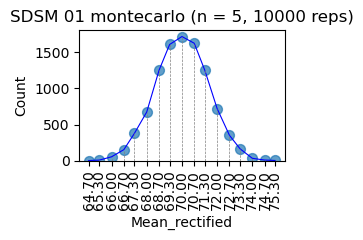

Mini pop mean: 70.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49
SDSM empirical SE/theoretical SE: 99.69%


In [5]:
sample_size_mini_pop_01 = 5
decimal_places_rounding = 2
repetitions_montecarlo = 10000

def calculate_SDSM_exhaustive(df, sample_size): # We must take into account the probabilities!
    unique_heights = df['Height'].values
    unique_probabilities = df['Probability'].values
    # Generate all possible combinations
    all_combs = list(product(unique_heights, repeat=sample_size))
    # Calculate their probabilities and mean
    probabilities = []
    means = []
    for comb in all_combs:
        prob = np.prod([unique_probabilities[np.where(unique_heights == x)[0][0]] for x in comb])
        mean = np.mean(comb)
        probabilities.append(prob)
        means.append(mean)
    # Create df_combinations
    df_combinations = pd.DataFrame({
        'Combination': all_combs,
        'Mean': means,
        'Probability': probabilities
    })
    # Calculate empirical SE (
    empirical_SE = np.sqrt(np.sum([p * m**2 for p, m in zip(probabilities, means)]) - np.sum([p * m for p, m in zip(probabilities, means)])**2)
    return df_combinations, empirical_SE

def calculate_SDSM_montecarlo(df, sample_size, repetitions_montecarlo):
    # Extract the height and probability data
    heights = df['Height'].values
    probabilities = df['Probability'].values
    # Initialize an array to store the sample means
    sample_means = np.zeros(repetitions_montecarlo)
    # Generate sample means according to the given probabilities
    for i in range(repetitions_montecarlo):
        random_sample = np.random.choice(heights, size=sample_size, p=probabilities)
        sample_means[i] = np.mean(random_sample)
    # Calculate the empirical Standard Error (SE)
    empirical_SE = np.std(sample_means, ddof=1)
    # Create a df with the sample means
    df_combinations = pd.DataFrame({'Mean': sample_means})
    return df_combinations, empirical_SE 

def rectify_means(df, decimal_places=2):
    # Rectify the means by rounding
    df['Mean_rectified'] = df['Mean'].round(decimal_places)
    if 'Probability' in df.columns:
        # Group by the rectified mean and sum the probabilities
        grouped_df = df.groupby('Mean_rectified').agg(
            Count=pd.NamedAgg(column='Mean', aggfunc='size'),
            Probability=pd.NamedAgg(column='Probability', aggfunc='sum')
        ).reset_index()
        probabilities = grouped_df['Probability'].values
    else:
        # Group by the rectified mean and count the occurrences
        grouped_df = df.groupby('Mean_rectified').agg(
            Count=pd.NamedAgg(column='Mean', aggfunc='size')
        ).reset_index()
        # Create a Probability column based on the counts
        total_count = grouped_df['Count'].sum()
        grouped_df['Probability'] = grouped_df['Count'] / total_count
        probabilities = grouped_df['Probability'].values
    # Calculate the weighted mean of Mean_rectified
    mean_rectified_values = grouped_df['Mean_rectified'].values
    weighted_mean = np.sum(probabilities * mean_rectified_values)
    # Calculate the weighted standard deviation of Mean_rectified
    weighted_var = np.sum(probabilities * (mean_rectified_values - weighted_mean)**2)
    weighted_std = np.sqrt(weighted_var)
    return grouped_df, weighted_std

def plot_sdsm(df_grouped, sample_size, title, column_name='Mean_rectified'):
    # Since df_grouped is already grouped and contains counts, no need to group again
    mean_counts = df_grouped
    # Plotting
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.scatter(mean_counts[column_name], mean_counts['Count'], alpha=0.7, s=50)
    ax.plot(mean_counts[column_name], mean_counts['Count'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row[column_name], row[column_name]], [0, row['Count']], linestyle='--', color='grey', linewidth=0.5)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(title)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    if len(mean_counts[column_name]) > 30:
        ax.set_xticks(np.linspace(mean_counts[column_name].min(), mean_counts[column_name].max(), 10))
    else:
        ax.set_xticks(mean_counts[column_name].values)
    ax.set_ylim(0,)
    if len(mean_counts[column_name]) > 4:
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    
def compare_empirical_estimated_SE(mean_pop, empirical_SE, pop_std, sample_size):
    theoretical_SE = pop_std / np.sqrt(sample_size)
    print(f"Mini pop mean: {mean_pop:.2f}")
    print(f"Mini pop std: {pop_std:.2f}")
    print(f"SDSM sample size: {sample_size}")
    print(f"SDSM empirical SE: {empirical_SE:.2f}")
    print(f"SDSM theoretical SE (from mini pop std): {theoretical_SE:.2f}")
    print(f"SDSM empirical SE/theoretical SE: {(empirical_SE/theoretical_SE) * 100:.2f}%")
    

print('SDSM mini pop 01 estimated by the exhaustive method:')
df_sdsm_mini_pop_01_exhaustive, _ = calculate_SDSM_exhaustive(df_mini_pop_01, sample_size_mini_pop_01)
df_sdsm_mini_pop_01_exhaustive_rectified, SE_sdsm_mini_pop_01_exhaustive_rectified = rectify_means(df_sdsm_mini_pop_01_exhaustive, decimal_places=1)
display(df_sdsm_mini_pop_01_exhaustive_rectified)
plot_sdsm(df_sdsm_mini_pop_01_exhaustive_rectified, sample_size_mini_pop_01, f"SDSM 01 exhaustive (n = {sample_size_mini_pop_01})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_sdsm_mini_pop_01_exhaustive_rectified, std_mini_pop_01, sample_size_mini_pop_01)

print('SDSM mini pop 01 estimated by the monte carlo method:')
df_sdsm_mini_pop_01_montecarlo, _ = calculate_SDSM_montecarlo(df_mini_pop_01, sample_size_mini_pop_01, repetitions_montecarlo)
df_sdsm_mini_pop_01_montecarlo_rectified, SE_sdsm_mini_pop_01_montecarlo_rectified = rectify_means(df_sdsm_mini_pop_01_montecarlo, decimal_places=1)
display(df_sdsm_mini_pop_01_montecarlo_rectified)
plot_sdsm(df_sdsm_mini_pop_01_montecarlo_rectified, sample_size_mini_pop_01, f"SDSM 01 montecarlo (n = {sample_size_mini_pop_01}, {repetitions_montecarlo} reps)", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_01, SE_sdsm_mini_pop_01_montecarlo_rectified, std_mini_pop_01, sample_size_mini_pop_01)

SDSM mini pop 02 estimated by the exhaustive method:


,Mean_rectified,Count,Probability
0,83.3,1,9.536743e-07
1,84.0,5,1.907349e-05
2,84.7,15,1.811981e-04
3,85.3,35,1.087189e-03
4,86.0,70,4.620552e-03
5,86.7,121,1.478577e-02
6,87.3,185,3.696442e-02
7,88.0,255,7.392883e-02
8,88.7,320,1.201344e-01
9,89.3,365,1.601791e-01


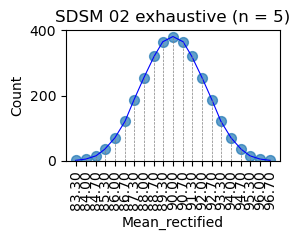

Mini pop mean: 90.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49
SDSM empirical SE/theoretical SE: 100.04%
SDSM mini pop 02 estimated by the monte carlo method:


,Mean_rectified,Count,Probability
0,84.7,1,0.0001
1,85.3,9,0.0009
2,86.0,44,0.0044
3,86.7,136,0.0136
4,87.3,377,0.0377
5,88.0,719,0.0719
6,88.7,1240,0.1240
7,89.3,1593,0.1593
8,90.0,1741,0.1741
9,90.7,1584,0.1584


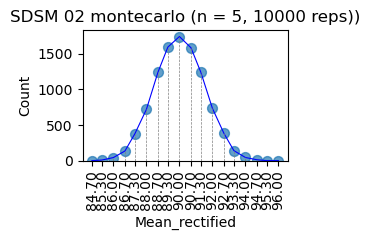

Mini pop mean: 90.00
Mini pop std: 3.33
SDSM sample size: 5
SDSM empirical SE: 1.49
SDSM theoretical SE (from mini pop std): 1.49
SDSM empirical SE/theoretical SE: 99.77%


In [6]:
sample_size_mini_pop_02 = 5

print('SDSM mini pop 02 estimated by the exhaustive method:')
df_sdsm_mini_pop_02_exhaustive, _ = calculate_SDSM_exhaustive(df_mini_pop_02, sample_size_mini_pop_02)
df_sdsm_mini_pop_02_exhaustive_rectified, SE_sdsm_mini_pop_02_exhaustive_rectified = rectify_means(df_sdsm_mini_pop_02_exhaustive, decimal_places=1)
display(df_sdsm_mini_pop_02_exhaustive_rectified)
plot_sdsm(df_sdsm_mini_pop_02_exhaustive_rectified, sample_size_mini_pop_02, f"SDSM 02 exhaustive (n = {sample_size_mini_pop_02})", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_02, SE_sdsm_mini_pop_02_exhaustive_rectified, std_mini_pop_02, sample_size_mini_pop_02)

print('SDSM mini pop 02 estimated by the monte carlo method:')
df_sdsm_mini_pop_02_montecarlo, _ = calculate_SDSM_montecarlo(df_mini_pop_02, sample_size_mini_pop_02, repetitions_montecarlo)
df_sdsm_mini_pop_02_montecarlo_rectified, SE_sdsm_mini_pop_02_montecarlo_rectified = rectify_means(df_sdsm_mini_pop_02_montecarlo, decimal_places=1)
display(df_sdsm_mini_pop_02_montecarlo_rectified)
plot_sdsm(df_sdsm_mini_pop_02_montecarlo_rectified, sample_size_mini_pop_02, f"SDSM 02 montecarlo (n = {sample_size_mini_pop_02}, {repetitions_montecarlo} reps))", column_name='Mean_rectified')
compare_empirical_estimated_SE(mean_mini_pop_02, SE_sdsm_mini_pop_02_montecarlo_rectified, std_mini_pop_02, sample_size_mini_pop_02)

### Get samples of mini population 01 (taking into account the population PMF)

Mini pop 01

Mean: 70.0
Std: 3.33

Random sample 


,Height,Count
0,66.67,5
1,70.00,4
2,76.67,1


Sample size: 10
Mean: 69.002
Std: 3.00
Z-score: -0.30


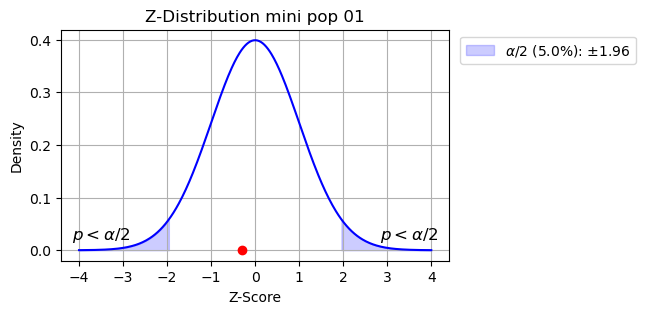

Decision: Because z(9) = -0.2995, p = 0.7646 < 0.05 (two-tailed z-test), the null hypothesis can NOT be rejected.
The sample mean ( =69.002) is NOT significantly different from the population mean (= 70.0).

Extreme sample 


,Height,Count
0,76.67,10


Sample size: 10
Mean: 76.67
Std: 0.00
Z-score: 2.00


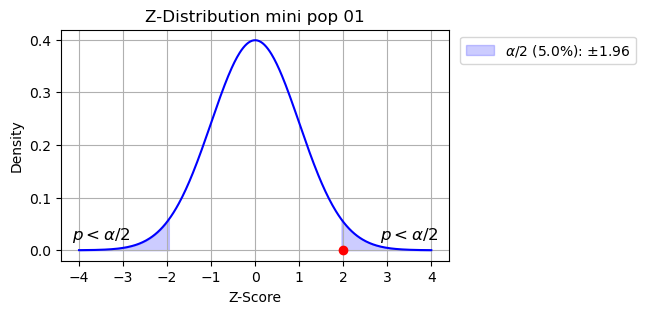

Decision: Because z(9) = 2.0015, p = 0.0453 < 0.05 (two-tailed z-test), the null hypothesis can be rejected.
The sample mean (= 76.67) is significantly different from the population mean (= 70.0).


In [7]:
size_sample_mini_pop_01 = 10
alpha_mini_pop_01 = 0.05

def generate_random_sample(df_mini_pop, sample_size):
    normalized_probabilities = df_mini_pop['Probability'] / df_mini_pop['Probability'].sum()
    sampled_means = np.random.choice(df_mini_pop['Height'], size=sample_size, p=normalized_probabilities)
    unique_values, counts = np.unique(sampled_means, return_counts=True)
    sampled_df = pd.DataFrame({'Height': unique_values, 'Count': counts})
    return sampled_df

def calculate_sample_z_score(sample_mean, population_mean, population_std):
    sample_z_score = (sample_mean - population_mean) / population_std
    return sample_z_score

def plot_z_distribution(sample_z_score, alpha, title):
    x = np.linspace(-4, 4, 400)  # Range of z-scores
    plt.figure(figsize=(5, 3))
    plt.plot(x, stats.norm.pdf(x), color='blue', label='Z-Distribution')
    x_fill = np.linspace(-4, -abs(stats.norm.ppf(alpha/2)), 100)  # Area to shade above alpha/2 on the left tail
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='blue', alpha=0.2)
    x_fill = np.linspace(abs(stats.norm.ppf(alpha/2)), 4, 100)  # Area to shade above alpha/2 on the right tail
    plt.fill_between(x_fill, stats.norm.pdf(x_fill), color='blue', alpha=0.2)
    plt.scatter(sample_z_score, 0, color='red', label=f'Sample Z-Score', zorder=5)
    # Add texts for p < alpha and p > alpha
    plt.text(-3.5, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
    plt.text(3.5, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.title(title)
    alpha_x = abs(stats.norm.ppf(alpha/2))
    alpha_patch = mpatches.Patch(color='blue', alpha=0.2, label=f'$\\alpha$/2 ({alpha * 100}%): $\\pm${alpha_x:.2f}')
    plt.legend(handles=[alpha_patch], loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.grid(True)
    plt.show()
    
def decision_z_distribution(mean_pop, mean_sample, sample_z_score, sample_size, alpha):
    df = sample_size - 1
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(sample_z_score)))
    print(f"Decision: Because z({df}) = {sample_z_score:.4f}, p = {p_value:.4f} < {alpha} (two-tailed z-test),", end=" ")
    if p_value < alpha:
         print(f"the null hypothesis can be rejected.\nThe sample mean (= {mean_sample}) is significantly different from the population mean (= {mean_pop}).")
    else:
        print(f"the null hypothesis can NOT be rejected.\nThe sample mean ( ={mean_sample}) is NOT significantly different from the population mean (= {mean_pop}).")
        
# Random sample following the normal probabilites
df_random_sample_mini_pop_01 = generate_random_sample(df_mini_pop_01, size_sample_mini_pop_01)
mean_random_sample_mini_pop_01 = calculate_weighted_mean(df_random_sample_mini_pop_01['Height'], df_random_sample_mini_pop_01['Count']).round(4)
std_random_sample_mini_pop_01 = calculate_weighted_std(df_random_sample_mini_pop_01['Height'], df_random_sample_mini_pop_01['Count']).round(4)
z_score_random_sample_mini_pop_01 = calculate_sample_z_score(mean_random_sample_mini_pop_01, mean_mini_pop_01, std_mini_pop_01)
print("Mini pop 01\n")
print(f"Mean: {mean_mini_pop_01}")
print(f"Std: {std_mini_pop_01:.2f}")
print("\nRandom sample ")
display(df_random_sample_mini_pop_01)
print(f"Sample size: {df_random_sample_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_random_sample_mini_pop_01}")
print(f"Std: {std_random_sample_mini_pop_01:.2f}")
print(f"Z-score: {z_score_random_sample_mini_pop_01:.2f}")
plot_z_distribution(z_score_random_sample_mini_pop_01, alpha_mini_pop_01, 'Z-Distribution mini pop 01')
decision_z_distribution(mean_mini_pop_01, mean_random_sample_mini_pop_01, z_score_random_sample_mini_pop_01, size_sample_mini_pop_01, alpha_mini_pop_01)
          
# Extreme sample
extreme_sample_mini_pop_01_dict = {'Height': [df_mini_pop_01['Height'].iloc[-1]], 'Count': [size_sample_mini_pop_01]}
df_extreme_sample_mini_pop_01 = pd.DataFrame(extreme_sample_mini_pop_01_dict)
mean_extreme_sample_mini_pop_01 = calculate_weighted_mean(df_extreme_sample_mini_pop_01['Height'], df_extreme_sample_mini_pop_01['Count']).round(4)
std_extreme_sample_mini_pop_01 = calculate_weighted_std(df_extreme_sample_mini_pop_01['Height'], df_extreme_sample_mini_pop_01['Count']).round(4)
z_score_extreme_sample_mini_pop_01 = calculate_sample_z_score(mean_extreme_sample_mini_pop_01, mean_mini_pop_01, std_mini_pop_01)
print("\nExtreme sample ")
display(df_extreme_sample_mini_pop_01)
print(f"Sample size: {df_extreme_sample_mini_pop_01['Count'].sum()}")
print(f"Mean: {mean_extreme_sample_mini_pop_01}")
print(f"Std: {std_extreme_sample_mini_pop_01:.2f}")
print(f"Z-score: {z_score_extreme_sample_mini_pop_01:.2f}")
plot_z_distribution(z_score_extreme_sample_mini_pop_01, alpha_mini_pop_01, 'Z-Distribution mini pop 01')
decision_z_distribution(mean_mini_pop_01, mean_extreme_sample_mini_pop_01, z_score_extreme_sample_mini_pop_01, size_sample_mini_pop_01, alpha_mini_pop_01)

### Get samples of mini population 02

Mini pop 02

Mean: 90.0
Std: 3.33

Random sample 


,Height,Count
0,86.67,7
1,90.00,3


Sample size: 10
Mean: 87.669
Std: 1.53
Z-score: -0.70


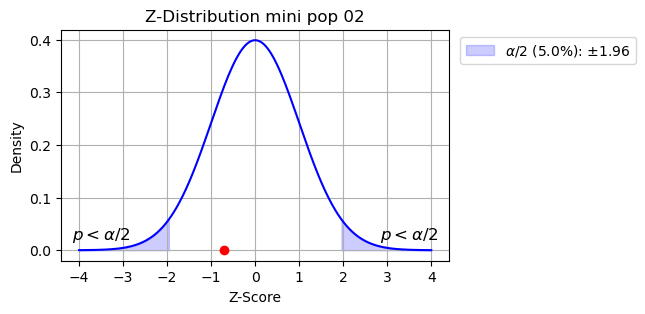

Decision: Because z(9) = -0.6995, p = 0.4843 < 0.05 (two-tailed z-test), the null hypothesis can NOT be rejected.
The sample mean ( =87.669) is NOT significantly different from the population mean (= 90.0).

Extreme sample 


,Height,Count
0,96.67,10


Sample size: 10
Mean: 96.67
Std: 0.00
Z-score: 2.00


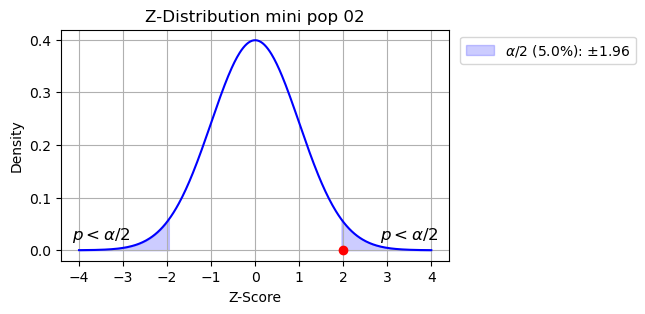

Decision: Because z(9) = 2.0015, p = 0.0453 < 0.05 (two-tailed z-test), the null hypothesis can be rejected.
The sample mean (= 96.67) is significantly different from the population mean (= 90.0).


In [8]:
size_sample_mini_pop_02 = 10
alpha_mini_pop_02 = 0.05

# Random sample following the normal probabilites
df_random_sample_mini_pop_02 = generate_random_sample(df_mini_pop_02, size_sample_mini_pop_02)
mean_random_sample_mini_pop_02 = calculate_weighted_mean(df_random_sample_mini_pop_02['Height'], df_random_sample_mini_pop_02['Count']).round(4)
std_random_sample_mini_pop_02 = calculate_weighted_std(df_random_sample_mini_pop_02['Height'], df_random_sample_mini_pop_02['Count']).round(4)
z_score_random_sample_mini_pop_02 = calculate_sample_z_score(mean_random_sample_mini_pop_02, mean_mini_pop_02, std_mini_pop_02)
print("Mini pop 02\n")
print(f"Mean: {mean_mini_pop_02}")
print(f"Std: {std_mini_pop_02:.2f}")
print("\nRandom sample ")
display(df_random_sample_mini_pop_02)
print(f"Sample size: {df_random_sample_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_random_sample_mini_pop_02}")
print(f"Std: {std_random_sample_mini_pop_02:.2f}")
print(f"Z-score: {z_score_random_sample_mini_pop_02:.2f}")
plot_z_distribution(z_score_random_sample_mini_pop_02, alpha_mini_pop_02, 'Z-Distribution mini pop 02')
decision_z_distribution(mean_mini_pop_02, mean_random_sample_mini_pop_02, z_score_random_sample_mini_pop_02, size_sample_mini_pop_02, alpha_mini_pop_02)

# Extreme sample
extreme_sample_mini_pop_02_dict = {'Height': [df_mini_pop_02['Height'].iloc[-1]], 'Count': [size_sample_mini_pop_02]}
df_extreme_sample_mini_pop_02 = pd.DataFrame(extreme_sample_mini_pop_02_dict)
mean_extreme_sample_mini_pop_02 = calculate_weighted_mean(df_extreme_sample_mini_pop_02['Height'], df_extreme_sample_mini_pop_02['Count']).round(4)
std_extreme_sample_mini_pop_02 = calculate_weighted_std(df_extreme_sample_mini_pop_02['Height'], df_extreme_sample_mini_pop_02['Count']).round(4)
z_score_extreme_sample_mini_pop_02 = calculate_sample_z_score(mean_extreme_sample_mini_pop_02, mean_mini_pop_02, std_mini_pop_02)
print("\nExtreme sample ")
display(df_extreme_sample_mini_pop_02)
print(f"Sample size: {df_extreme_sample_mini_pop_02['Count'].sum()}")
print(f"Mean: {mean_extreme_sample_mini_pop_02}")
print(f"Std: {std_extreme_sample_mini_pop_02:.2f}")
print(f"Z-score: {z_score_extreme_sample_mini_pop_02:.2f}")
plot_z_distribution(z_score_extreme_sample_mini_pop_02, alpha_mini_pop_02, 'Z-Distribution mini pop 02')
decision_z_distribution(mean_mini_pop_02, mean_extreme_sample_mini_pop_02, z_score_extreme_sample_mini_pop_02, size_sample_mini_pop_02, alpha_mini_pop_02)

### One sample t-test
* If the population is known, we assume that the SDSM is a z-distribution
* If the population is not known and sample size >= 30, the SDSM follows either a t- or z-distribution
* If the population is not know and sample size < 30, the SDSM follows a t-distribution

#### Assumptions
1. **Normality**: The populations should be approximately normally distributed. For smaller sample sizes, this assumption is crucial, but as the sample size increases, thanks to the Central Limit Theorem, the $ t $-test becomes more robust to violations of this assumption.
2. **Random Sampling**
3. **Independence of Observations**
4. **Absence of Outliers**: The $ t $-test can be sensitive to outliers.
5. **Scale of Measurement**: the dependent variable should be measured measured on at least an interval scale. This means that there should be consistent intervals between scores on the measured outcome.



#### Check for normality with the Shapiro-Wilk test
The Shapiro-Wilk test is best suited for small to moderate sample sizes (N < 50). For large sample sizes, the test can show statistical significance (i.e., reject the null hypothesis of normality) even for tiny deviations from normality, which might not be practically relevant.

In [9]:
def check_normality(df):
    # Convert the 'Count' column to integers
    df['Count'] = df['Count'].astype(int)
     # Create an empty list to store the expanded dataset
    expanded_data = []
    # Loop through each row in the dataframe
    for i, row in df.iterrows():
        height = row["Height"]
        count = int(row["Count"])  # Explicitly casting to int for safety
        # Add 'count' number of 'height' values to the expanded dataset
        expanded_data.extend([height] * count)
    # Convert the list to a NumPy array
    expanded_data_array = np.array(expanded_data)
    # Perform the Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(expanded_data_array)
    print(f"Shapiro-Wilk test statistic: {shapiro_stat}")
    print(f"P-value: {shapiro_p}")
    if shapiro_p > 0.05:
        print("Scores: Data follows a normal distribution")
    else:
        print("Scores: Data does not follow a normal distribution")
    # Return the test statistic and p-value
    return shapiro_stat, shapiro_p

# Execute the function
print('Mini pop 01:')
shapiro_stat, shapiro_p = check_normality(df_mini_pop_01)
print('\nMini pop 02:')
shapiro_stat, shapiro_p = check_normality(df_mini_pop_01)

Mini pop 01:
Shapiro-Wilk test statistic: 0.9320355653762817
P-value: 0.26253610849380493
Scores: Data follows a normal distribution

Mini pop 02:
Shapiro-Wilk test statistic: 0.9320355653762817
P-value: 0.26253610849380493
Scores: Data follows a normal distribution


In [10]:
# Get an independent random sample with replacement (not taking into account the population PMF)

size_sample_ttest_mini_pop_01 = 10

sample_ttest_mini_pop_01 = df_mini_pop_01['Height'].sample(size_sample_ttest_mini_pop_01, replace=True)
print(sample_ttest_mini_pop_01.tolist())

mean_sample_ttest_mini_pop_01 = round(sample_ttest_mini_pop_01.mean(), 4)
std_sample_ttest_mini_pop_01 = round(sample_ttest_mini_pop_01.std(), 4)
estimated_SE = round(std_sample_ttest_mini_pop_01/np.sqrt(size_sample_ttest_mini_pop_01), 4)

print(f"\nMean sample: {mean_sample_ttest_mini_pop_01}")
print(f"Std sample: {std_sample_ttest_mini_pop_01}")
print(f"Estimated SE sample: {estimated_SE}")

[70.0, 76.67, 66.67, 70.0, 70.0, 63.33, 66.67, 63.33, 76.67, 66.67]

Mean sample: 69.001
Std sample: 4.7287
Estimated SE sample: 1.4953
